In [19]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [20]:
movie_df = pd.read_csv(r'sample_data/Movies_textProce.csv')
print(movie_df.shape)
movie_df.head()

(6, 5)


,id,movie,review,Unnamed: 3,Unnamed: 4
0,1,Alice in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...,NaN,NaN
1,2,A Beautiful Mind,Beautiful Mind is a biographical movie about J...,"Such movies, telling us about the life of a fa...",NaN
2,3,Wanted,The well-known Universal Studios film company ...,The atmosphere of comics entirely suited to th...,NaN
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...
4,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...


#Moviews Review- Text Process
copy-pasting the reviews into a csv file, single paragraphs in each review ended up in different columns. And it seems like we also have a duplicate.

Objective - Clean Data with a single "Review" column

###Remove Duplicates

**Mark Duplicates**

In [21]:
#subset can be whole data frame or selective column for finding duplicates
movie_df['dup'] = movie_df.duplicated(subset=None, keep='first')
movie_df.head()

,id,movie,review,Unnamed: 3,Unnamed: 4,dup
0,1,Alice in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...,NaN,NaN,False
1,2,A Beautiful Mind,Beautiful Mind is a biographical movie about J...,"Such movies, telling us about the life of a fa...",NaN,False
2,3,Wanted,The well-known Universal Studios film company ...,The atmosphere of comics entirely suited to th...,NaN,False
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...,False
4,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...,True


In [22]:
movie_df.duplicated(subset=None, keep='first')

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

**Filter duplicate rows**

In [23]:
movie_df = movie_df[movie_df['dup'] == False]
movie_df.shape

(5, 6)

**Delete Dup Column**

In [24]:
del movie_df['dup']

###Merging columns

In [25]:
movie_df.columns[2:]

Index(['review', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [26]:
movie_df['full_review'] = movie_df[movie_df.columns[2:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

In [27]:
movie_df

,id,movie,review,Unnamed: 3,Unnamed: 4,full_review
0,1,Alice in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...,NaN,NaN,Tim Burton’s“Alice in Wonderland” was probably...
1,2,A Beautiful Mind,Beautiful Mind is a biographical movie about J...,"Such movies, telling us about the life of a fa...",NaN,Beautiful Mind is a biographical movie about J...
2,3,Wanted,The well-known Universal Studios film company ...,The atmosphere of comics entirely suited to th...,NaN,The well-known Universal Studios film company ...
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...,Robert Downey Jr. and Jude Law tried to embody...
5,5,Kites,"“Kites” is not a traditional Indian movie, but...","This story is very exciting. Moreover, it is a...",NaN,"“Kites” is not a traditional Indian movie, but..."


**Verify the concatination**

In [28]:
movie_df.iloc[3,5]

'Robert Downey Jr. and Jude Law tried to embody unforgettable images of Sherlock Holmes and Doctor Watson in this bold new film version. In G. Ritchie’s “Sherlock Holmes” the legendary detective shows not only his unmatched intelligence, but also considerable physical training as well. Entangled evidence, amazing deduction of Holmes and his lively mind combine into an exciting series of grueling events. The director Guy Ritchie represents a fascinating adaptation of one of the world’s best detectives. Meet the new Sherlock Holmes! The plot is as follows: Holmes (Robert Downey Jr.) is rather depressed because of the possibility of Watson’s (Jude Law) marriage. His mood is also compounded by the absence of interesting cases. Trying to relax, he invents a silencer, does not go out of his room, participates in fights without rules and plays violin.'

**Remove unwanted Columns**

In [29]:
cols = [2,3,4]  #column indexes we dont need
movie_df.drop(movie_df.columns[cols],axis=1,inplace=True)

In [30]:
movie_df

,id,movie,full_review
0,1,Alice in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...
1,2,A Beautiful Mind,Beautiful Mind is a biographical movie about J...
2,3,Wanted,The well-known Universal Studios film company ...
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...
5,5,Kites,"“Kites” is not a traditional Indian movie, but..."


###Text PreProecssing
- Keep only letters
- remove stopwords
- stemm or lemmatise words
- populate cleaned new text column 

***Processing**

---



Converting all words to lowercase and removing punctuations if any
**Stemming and Lemmatization are text normalization techniques** within the field of Natural language Processing that are used to prepare text, words, and documents for further processing.

**Stemming**- Converting the words into their base word or stem word ( Ex - tastefully, tasty, these words are converted to stem word called 'tasti'). This reduces the vector dimension because we dont consider all similar words
**algo: Snowball Stemmer, Porter Stemmer**

**Stopwords** - Stopwords are the unnecessary words that even if they are removed the sentiment of the sentence dosent change.

Ex - This pasta is so tasty ==> pasta tasty ( This , is, so are stopwords so they are removed)

**Lemmatization** looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words.
Ex. I saw eighteen mice today!"

-PRON- see eighteen mouse today!

saw ==> see
mice ==> mouse

Note: Stem may not be an actual word whereas, lemma is an actual language word.

In [31]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'sample_data/smartStoplist.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
   # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)

    
    my_stemmer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = my_stemmer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

**Test the functions**

In [32]:
test_sentence = "this is a sentence to demonstrate how the preprocessing function works...!"

preprocess(test_sentence)

'sentenc demonstr preprocess function work'

**populate prep column**

In [33]:
movie_df['prep'] = movie_df['full_review'].apply(preprocess) 

In [34]:
movie_df

,id,movie,full_review,prep
0,1,Alice in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...,tim burton alic wonderland anticip movi year g...
1,2,A Beautiful Mind,Beautiful Mind is a biographical movie about J...,beauti mind biograph movi john forb nash junio...
2,3,Wanted,The well-known Universal Studios film company ...,univers studio film compani plan shoot movi wa...
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,robert downey jr jude law embodi unforgett ima...
5,5,Kites,"“Kites” is not a traditional Indian movie, but...",kite tradit indian movi breath take action fil...


###Most Common Words

In [35]:
from collections import Counter
Counter(" ".join(movie_df["prep"]).split()).most_common(10)

[('movi', 8),
 ('film', 8),
 ('holm', 5),
 ('hard', 4),
 ('alic', 3),
 ('stori', 3),
 ('life', 3),
 ('speak', 3),
 ('mind', 3),
 ('want', 3)]

###Word Cloud

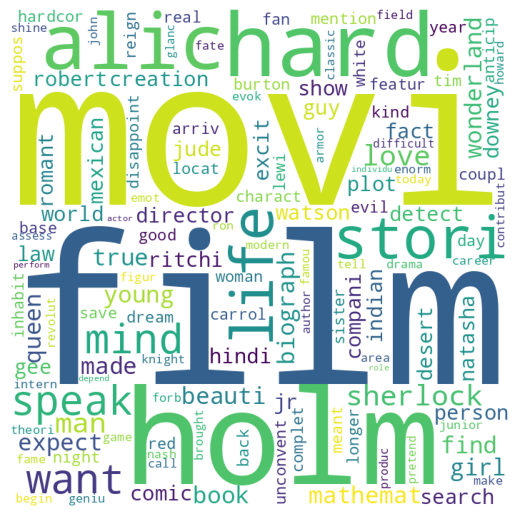

In [36]:
#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in movie_df["prep"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [37]:
from nltk.util import ngrams
n_gram = 2
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 2:
        print(i, n_gram_dic[i])

('beauti', 'mind') 2
('robert', 'downey') 2
('downey', 'jr') 2
('jude', 'law') 2
('sherlock', 'holm') 3
('love', 'stori') 2


For **Unigram** refer 
https://www.kaggle.com/code/jacobabello/donald-trump-rally-speeches/notebook


### Web reference - https://github.com/lisanka93/text_analysis_python_101/blob/master/Dummy%20movie%20dataset.ipynb
